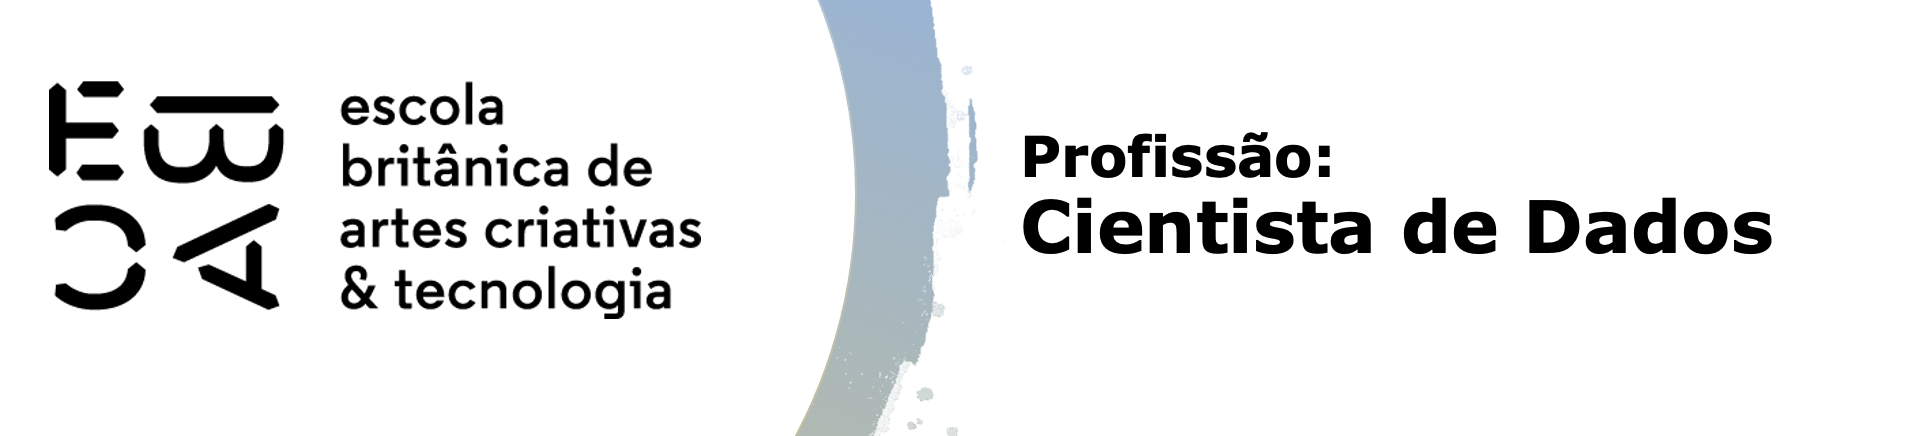

# Árvores II - Tarefa 3

### 1. Carregar as bases

Vamos utilizar nesta tarefa as bases de reconhecimento de atividade humana através do celular. Carregue novamente as bases salvas na tarefa I.

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import graphviz
from IPython.display import display
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [2]:
# Carregando as bases de dados
# Treino
X_treino = pd.read_csv("X_tr.csv")
y_treino = pd.read_csv("y_train.txt", delimiter = " ", header = None, names = ["Atividade"])

#Teste
X_teste = pd.read_csv("X_tt.csv")
y_teste = pd.read_csv("y_test.txt", delimiter = " ", header = None, names = ["Atividade"])

### 2. Calcule os ```ccp_alphas```. 

Vamos seguir uma lógica bem em linha com o que já estamso acostumados, com as seguintes orientações:

- Utilizar treinamento e teste conforme já vieram definidos originalmente
- Por pragmatismo, utilizar ```min_samples_leaf=20```
- Utilize as mesmas "3 melhores variáveis" identificadas no exercício anterior.

In [3]:
%%time
# Considerando que as bases já estão divididas não é nescessário fazer a separação entre teste e treino

min_samples_leaf = 20

print("As variáveis identificadas no exercício anterior são: ")
print("\n*53 tGravityAcc-min()-X, \n*382fBodyAccJerk-bandsEnergy()-1,8, 4\n*2 tGravityAcc-mean()-Y\n")

X_tr = X_treino[["53 tGravityAcc-min()-X", "382 fBodyAccJerk-bandsEnergy()-1,8", "42 tGravityAcc-mean()-Y"]]

X_tt = X_teste[["53 tGravityAcc-min()-X", "382 fBodyAccJerk-bandsEnergy()-1,8", "42 tGravityAcc-mean()-Y"]]

As variáveis identificadas no exercício anterior são: 

*53 tGravityAcc-min()-X, 
*382fBodyAccJerk-bandsEnergy()-1,8, 4
*2 tGravityAcc-mean()-Y

CPU times: total: 15.6 ms
Wall time: 2.02 ms


In [4]:
%%time
# Calculando a árvore de decisão, considerando as bases anteriomente selecionadas
tree = DecisionTreeClassifier(random_state=2360873, min_samples_leaf = min_samples_leaf)
path = tree.cost_complexity_pruning_path(X_tr, y_treino)

CPU times: total: 15.6 ms
Wall time: 16.5 ms


In [5]:
%%time
# Calculando o  ccp_alpha
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# ccp_alphas únicos e positivos
ccp_alphas = np.unique(ccp_alphas[ccp_alphas>=0])

print("Foram calculados", pd.DataFrame(ccp_alphas).nunique(axis=1).sum(), "quantidade de ccp_alphas únicos.")
print("\n")
print("Os valores de ccp_alpha calculados são:\n", ccp_alphas)

Foram calculados 114 quantidade de ccp_alphas únicos.


Os valores de ccp_alpha calculados são:
 [0.00000000e+00 6.59906426e-06 6.96674540e-06 7.12472149e-06
 7.27534985e-06 8.46900856e-06 9.14215380e-06 9.41658994e-06
 9.89217529e-06 1.04385454e-05 1.07972583e-05 1.08258755e-05
 1.17126103e-05 1.75427739e-05 2.04026115e-05 2.37380703e-05
 3.07214987e-05 3.18341304e-05 3.34812087e-05 3.74117525e-05
 5.08542540e-05 5.58810444e-05 5.87197700e-05 6.12078346e-05
 6.37117556e-05 6.75620141e-05 7.02756620e-05 7.29744201e-05
 7.95593933e-05 8.56481444e-05 9.26213793e-05 9.78095954e-05
 9.85135044e-05 9.93339269e-05 1.12102261e-04 1.12942408e-04
 1.14584364e-04 1.39637828e-04 1.42818281e-04 1.49619151e-04
 1.53540577e-04 1.53632278e-04 1.62234137e-04 2.16391334e-04
 2.26479830e-04 2.38088595e-04 2.43367401e-04 2.44831338e-04
 2.46111771e-04 2.62888005e-04 2.72551204e-04 2.78023008e-04
 2.85636561e-04 2.97189102e-04 3.05950850e-04 3.11485758e-04
 3.17983236e-04 3.60123931e-04 4.31879168e-04 4.3

### 3. *Grid Search*

Vou deixar especificações iniciais mínimas, que visam limitar o tempo de máquina, pois um procedimento desses pode demorar muito tempo dependendo da especificação. Mas conforme você for ficando confortável com o tempo consumido pelo procedimento, pode fazer um algoritmo mais exaustivo, por exemplo, avaliando mais valores de ```ccp_alpha```.

- Meça o tempo
- Utilize a base de treinamento
- Utilize um *cross validation* do tipo *k-fold*, especifique k=10
- Você pode ler 1 a cada ```k``` valores para uma melhor varredura utilizando, por exemplo, ```ccp_alpha[::10]```
- Não se esqueça de limitar o número de variáveis

In [6]:
def Grid(k, ccp_alpha):
    ccp_alphas_reduced = ccp_alpha[::k]

    # Cálculo dos grid (k-fold)
    grid_parametros = {'ccp_alpha':ccp_alphas_reduced}
    print("ccp_alphas reduzidos:\n", ccp_alphas_reduced)

    grid = GridSearchCV(estimator = tree, param_grid=grid_parametros,cv=15, verbose=1)
    grid.fit(X_tr, y_treino) 

    return grid

In [7]:
%%time
# Reduzindo o ccp_alpha para k elementos (sendo k = 10)
k = 10
grid10 = Grid(k, ccp_alphas)

resultados10 = pd.DataFrame(grid10.cv_results_)

display(resultados10.head(2))
print("\n")
print("Melhor valor de grid para esses valores de ccp_alpha:", grid10.best_score_)
print("\n")

ccp_alphas reduzidos:
 [0.00000000e+00 1.07972583e-05 5.08542540e-05 9.26213793e-05
 1.53540577e-04 2.72551204e-04 4.35126977e-04 6.01739401e-04
 1.05235222e-03 1.42751019e-03 2.58675633e-03 6.52814468e-02]
Fitting 15 folds for each of 12 candidates, totalling 180 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split8_test_score,split9_test_score,split10_test_score,split11_test_score,split12_test_score,split13_test_score,split14_test_score,mean_test_score,std_test_score,rank_test_score
0,0.012181,0.006049,0.002383,0.004453,0.000000,{'ccp_alpha': 0.0},0.824847,0.718941,0.863265,0.82449,...,0.685714,0.744898,0.781633,0.765306,0.904082,0.718367,0.822449,0.778702,0.063063,9
1,0.013976,0.006293,0.001379,0.003046,0.000011,{'ccp_alpha': 1.0797258337727348e-05},0.824847,0.718941,0.863265,0.82449,...,0.685714,0.744898,0.781633,0.765306,0.904082,0.718367,0.822449,0.778702,0.063063,9




Melhor valor de grid para esses valores de ccp_alpha: 0.806856477825346


CPU times: total: 5.38 s
Wall time: 5.51 s


O resultado mostra que a árvore com k = 10 tem uma boa aproximação e o cálculo rodou em um tempo relativamente baixo.

In [8]:
%%time
# Reduzindo o ccp_alpha para k elementos (sendo k = 20)
k = 20
grid20 = Grid(k, ccp_alphas)

resultados20 = pd.DataFrame(grid20.cv_results_)

display(resultados20.head(2))
print("\n")
print("Melhor valor de grid para esses valores de ccp_alpha:", grid20.best_score_)
print("\n")

ccp_alphas reduzidos:
 [0.00000000e+00 5.08542540e-05 1.53540577e-04 4.35126977e-04
 1.05235222e-03 2.58675633e-03]
Fitting 15 folds for each of 6 candidates, totalling 90 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split8_test_score,split9_test_score,split10_test_score,split11_test_score,split12_test_score,split13_test_score,split14_test_score,mean_test_score,std_test_score,rank_test_score
0,0.034788,0.010509,0.003936,0.002114,0.000000,{'ccp_alpha': 0.0},0.824847,0.718941,0.863265,0.82449,...,0.685714,0.744898,0.781633,0.765306,0.904082,0.718367,0.822449,0.778702,0.063063,5
1,0.020993,0.012649,0.002809,0.002253,0.000051,{'ccp_alpha': 5.085425401150619e-05},0.824847,0.718941,0.863265,0.82449,...,0.685714,0.744898,0.781633,0.765306,0.904082,0.718367,0.822449,0.778702,0.063063,5




Melhor valor de grid para esses valores de ccp_alpha: 0.806856477825346


CPU times: total: 2.67 s
Wall time: 2.71 s


O resultado da árvore cálculada com k = 20 é igual ao anterior, mas o código rodou em menor tempo.

In [9]:
%%time
# Reduzindo o ccp_alpha para k elementos (sendo k = 5)
k = 5
grid5 = Grid(k, ccp_alphas)

resultados5 = pd.DataFrame(grid5.cv_results_)

display(resultados5.head(2))
print("\n")
print("Melhor valor de grid para esses valores de ccp_alpha:", grid5.best_score_)
print("\n")

ccp_alphas reduzidos:
 [0.00000000e+00 8.46900856e-06 1.07972583e-05 2.37380703e-05
 5.08542540e-05 6.75620141e-05 9.26213793e-05 1.12942408e-04
 1.53540577e-04 2.38088595e-04 2.72551204e-04 3.11485758e-04
 4.35126977e-04 4.92577336e-04 6.01739401e-04 8.08841696e-04
 1.05235222e-03 1.20501155e-03 1.42751019e-03 2.03066222e-03
 2.58675633e-03 5.15020990e-03 6.52814468e-02]
Fitting 15 folds for each of 23 candidates, totalling 345 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split8_test_score,split9_test_score,split10_test_score,split11_test_score,split12_test_score,split13_test_score,split14_test_score,mean_test_score,std_test_score,rank_test_score
0,0.041332,0.013269,0.006452,0.003567,0.000000,{'ccp_alpha': 0.0},0.824847,0.718941,0.863265,0.82449,...,0.685714,0.744898,0.781633,0.765306,0.904082,0.718367,0.822449,0.778702,0.063063,18
1,0.028482,0.011099,0.005479,0.003521,0.000008,{'ccp_alpha': 8.469008561397511e-06},0.824847,0.718941,0.863265,0.82449,...,0.685714,0.744898,0.781633,0.765306,0.904082,0.718367,0.822449,0.778702,0.063063,18




Melhor valor de grid para esses valores de ccp_alpha: 0.806856477825346


CPU times: total: 11.3 s
Wall time: 11.4 s


O resultado da árvore k = 5 é igual aos valores anteriormente calculados, mas sendo o código mais demorado para rodar.

In [10]:
%%time
# Reduzindo o ccp_alpha para k elementos (sendo k = 1)
k = 1
grid1 = Grid(k, ccp_alphas)

resultados1 = pd.DataFrame(grid1.cv_results_)

display(resultados1.head(2))
print("\n")
print("Melhor valor de grid para esses valores de ccp_alpha:", grid1.best_score_)
print("\n")

ccp_alphas reduzidos:
 [0.00000000e+00 6.59906426e-06 6.96674540e-06 7.12472149e-06
 7.27534985e-06 8.46900856e-06 9.14215380e-06 9.41658994e-06
 9.89217529e-06 1.04385454e-05 1.07972583e-05 1.08258755e-05
 1.17126103e-05 1.75427739e-05 2.04026115e-05 2.37380703e-05
 3.07214987e-05 3.18341304e-05 3.34812087e-05 3.74117525e-05
 5.08542540e-05 5.58810444e-05 5.87197700e-05 6.12078346e-05
 6.37117556e-05 6.75620141e-05 7.02756620e-05 7.29744201e-05
 7.95593933e-05 8.56481444e-05 9.26213793e-05 9.78095954e-05
 9.85135044e-05 9.93339269e-05 1.12102261e-04 1.12942408e-04
 1.14584364e-04 1.39637828e-04 1.42818281e-04 1.49619151e-04
 1.53540577e-04 1.53632278e-04 1.62234137e-04 2.16391334e-04
 2.26479830e-04 2.38088595e-04 2.43367401e-04 2.44831338e-04
 2.46111771e-04 2.62888005e-04 2.72551204e-04 2.78023008e-04
 2.85636561e-04 2.97189102e-04 3.05950850e-04 3.11485758e-04
 3.17983236e-04 3.60123931e-04 4.31879168e-04 4.33312607e-04
 4.35126977e-04 4.43756801e-04 4.67935300e-04 4.83869646e-04
 

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split8_test_score,split9_test_score,split10_test_score,split11_test_score,split12_test_score,split13_test_score,split14_test_score,mean_test_score,std_test_score,rank_test_score
0,0.029543,0.008833,0.004352,0.003008,0.000000,{'ccp_alpha': 0.0},0.824847,0.718941,0.863265,0.82449,...,0.685714,0.744898,0.781633,0.765306,0.904082,0.718367,0.822449,0.778702,0.063063,84
1,0.030041,0.009530,0.004318,0.002490,0.000007,{'ccp_alpha': 6.599064264795887e-06},0.824847,0.718941,0.863265,0.82449,...,0.685714,0.744898,0.781633,0.765306,0.904082,0.718367,0.822449,0.778702,0.063063,84




Melhor valor de grid para esses valores de ccp_alpha: 0.813936295495795


CPU times: total: 55.8 s
Wall time: 56.6 s


O resultado da árvore k = 1 é melhor que os valores anteriormente calculados, mas demorando muito tempo, quase 1 min, para o código rodar.

In [11]:
%%time
# Reduzindo o ccp_alpha para k elementos (sendo k = 3)
k = 3
grid3 = Grid(k, ccp_alphas)

resultados3 = pd.DataFrame(grid3.cv_results_)

display(resultados3.head(2))
print("\n")
print("Melhor valor de grid para esses valores de ccp_alpha:", grid3.best_score_)
print("\n")

ccp_alphas reduzidos:
 [0.00000000e+00 7.12472149e-06 9.14215380e-06 1.04385454e-05
 1.17126103e-05 2.37380703e-05 3.34812087e-05 5.58810444e-05
 6.37117556e-05 7.29744201e-05 9.26213793e-05 9.93339269e-05
 1.14584364e-04 1.49619151e-04 1.62234137e-04 2.38088595e-04
 2.46111771e-04 2.78023008e-04 3.05950850e-04 3.60123931e-04
 4.35126977e-04 4.83869646e-04 5.40124578e-04 5.93793439e-04
 6.52940792e-04 8.08841696e-04 9.30244852e-04 1.07142910e-03
 1.18832933e-03 1.28759635e-03 1.42751019e-03 1.49608861e-03
 2.04736022e-03 2.20681155e-03 3.94924308e-03 5.15020990e-03
 1.04498755e-02 1.09160152e-01]
Fitting 15 folds for each of 38 candidates, totalling 570 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split8_test_score,split9_test_score,split10_test_score,split11_test_score,split12_test_score,split13_test_score,split14_test_score,mean_test_score,std_test_score,rank_test_score
0,0.026731,0.009660,0.004055,0.003079,0.000000,{'ccp_alpha': 0.0},0.824847,0.718941,0.863265,0.82449,...,0.685714,0.744898,0.781633,0.765306,0.904082,0.718367,0.822449,0.778702,0.063063,29
1,0.014757,0.001467,0.002202,0.000473,0.000007,{'ccp_alpha': 7.124721488159969e-06},0.824847,0.718941,0.863265,0.82449,...,0.685714,0.744898,0.781633,0.765306,0.904082,0.718367,0.822449,0.778702,0.063063,29




Melhor valor de grid para esses valores de ccp_alpha: 0.8097186084209651


CPU times: total: 17.5 s
Wall time: 17.8 s


Para a árvore de k = 3 houve um pequeno aumento do resultado, havendo um aumento não muito perceptivo no tempo de espera do código.

### 4. Avaliando a árvore

- Obtenha a árvore na melhor configuração treinada em toda a base de treino
- Calcule a acurácia dessa árvore na base de testes
- Visualize a matriz de confusão

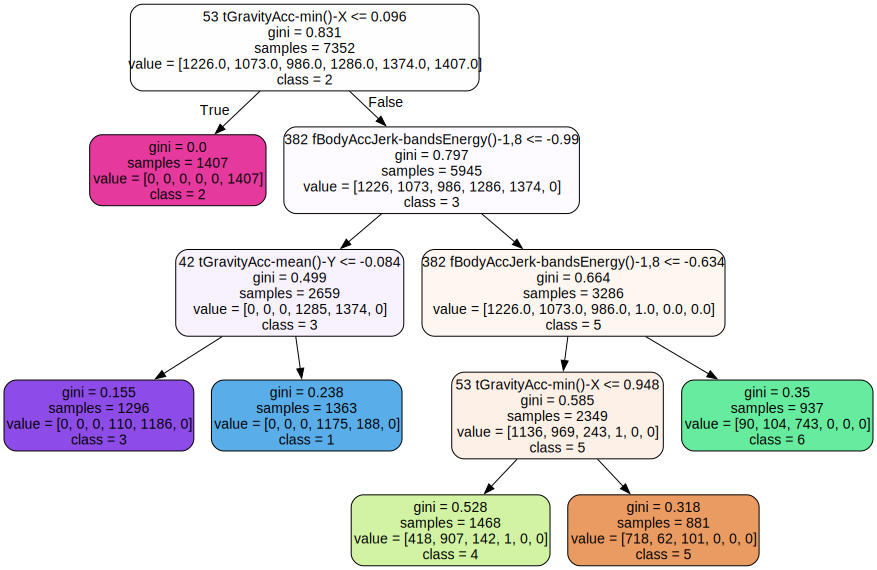

In [12]:
# Utilizando o valor de k = 3 da árvore calculada anteriormente, como sendo a melhor árvore
ccp_alpha = resultados3.iloc[grid3.best_index_,4]
tree = DecisionTreeClassifier(random_state = 2360873, 
                              min_samples_leaf = min_samples_leaf,
                              ccp_alpha = ccp_alpha)
tree.fit(X_tr, y_treino)  

# Gerando a visualização da árvore ajustada
tree_dot = export_graphviz(tree, 
                           out_file=None, 
                           feature_names=X_tr.columns, 
                           class_names=[str(cls) for cls in y_treino["Atividade"].unique()],
                           filled=True, 
                           rounded=True)
tree_viz = graphviz.Source(tree_dot)
tree_viz

In [13]:
# Calculo da acurácia na base de testes
score = tree.score(X_tt, y_teste)  

print(f"A melhor acurácia na base de teste utilizando o alpha igual a {ccp_alpha} é {score}")

A melhor acurácia na base de teste utilizando o alpha igual a 0.010449875472004655 é 0.7628096369189006


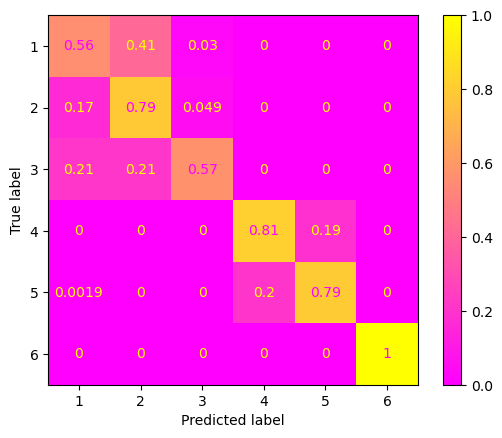

In [14]:
# Matriz de confusão para a melhor árvore na base de teste
ConfusionMatrixDisplay.from_estimator(
    tree,
    X_tt,
    y_teste,
    cmap=plt.cm.spring,
    normalize='true'
)

A árvore calculada tem boa aproximação com altos valores de acurácia, havendo acurácia aproximada de 100% para as atividades de rótulo 6, e, mesmo a acurácia mínima sendo superior a 50%.

### 5. Melhorando a árvore

A melhor forma de se melhorar um algoritmo é colocando nele novas variáveis que agreguem valor. Podemos usar a força-bruta e ir colocando variáveis aleatoriamente - ou colocar todas e deixar rodando por um bom tempo - ou utilizar uma lógica eficiente e fazer uma seleção de variáveis.

- Observe que há classes mais fáceis e mais difíceis de se identificar
- Crie uma variável binária para uma das classes de maior erro
- Fala uma árvore de classificação bem simples para esta variável:
    - utilize ```mean_samples_leaf=20```
    - utilize ```max_depth=4```
    - coloque todas as variáveis
- Observe a importância das variáveis, e selecione as 3 com maior importância
- Rode novamente o algoritmo acima com as 3 novas variáveis e avalie a acurácia

Observamos uma acurácia de 100% para a definição dos valores de atividades de rótulo 6, nesse exercício e no anterior. Sendo o menor valor de acurácia a referente as atividades de rótulo 1, aproximadamente, 56, na tarefa atual. Esse fato pode definir respostas muito semelhantes para as respostas do exercício 6.

In [16]:
print("A classe de maior erro que será utilizada para a criação da variável binária será a Ativide rotulada como 1.\n")
classe_maior_erro = 1

# Criando a variável binária para a base de treino
y_tr_binaria = (y_treino["Atividade"] == classe_maior_erro).astype(int) if isinstance(y_treino, pd.DataFrame) else (y_treino == classe_maior_erro).astype(int)
print("Base de treino com variável binária:")
display(y_tr_binaria.head())

print("----" * 30)

# Criando a variável binária para a base de teste
y_tt_binaria = (y_teste["Atividade"] == classe_maior_erro).astype(int) if isinstance(y_teste, pd.DataFrame) else (y_teste == classe_maior_erro).astype(int)
print("Base de teste com variável binária:")
display(y_tt_binaria.head())

A classe de maior erro que será utilizada para a criação da variável binária será a Ativide rotulada como 1.

Base de treino com variável binária:


0    0
1    0
2    0
3    0
4    0
Name: Atividade, dtype: int32

------------------------------------------------------------------------------------------------------------------------
Base de teste com variável binária:


0    0
1    0
2    0
3    0
4    0
Name: Atividade, dtype: int32

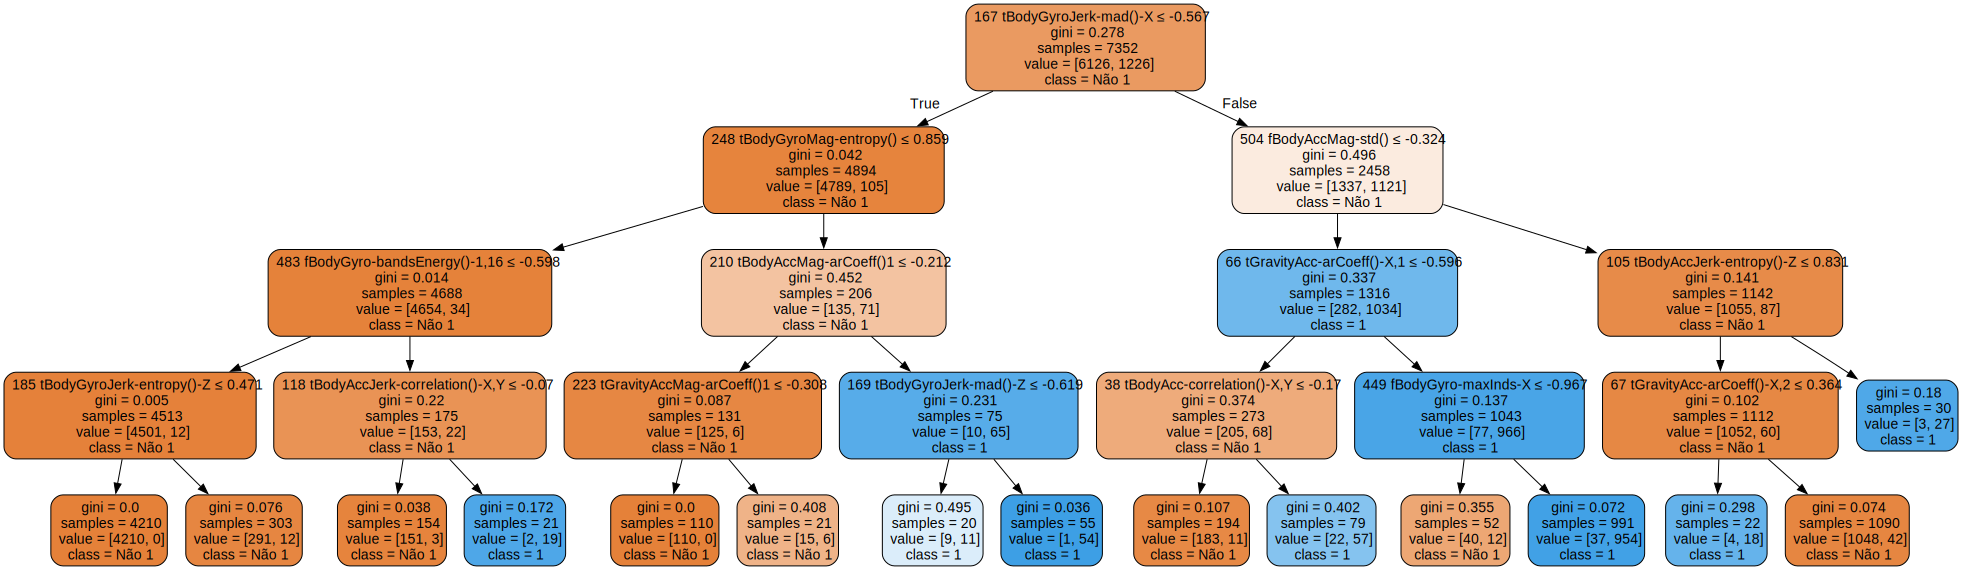

In [17]:
# Árvore simples para a variável binária
tree_simples = DecisionTreeClassifier(
    min_samples_leaf=min_samples_leaf,
    max_depth=4,
    random_state=2360873
)
tree_simples.fit(X_treino, y_tr_binaria)

# Visualização
tree_dot_novo = export_graphviz(tree_simples, out_file=None, feature_names=X_treino.columns, 
                           class_names=["Não " + str(classe_maior_erro), str(classe_maior_erro)], 
                           filled=True, rounded=True, special_characters=True)
tree_viz = graphviz.Source(tree_dot_novo)
tree_viz

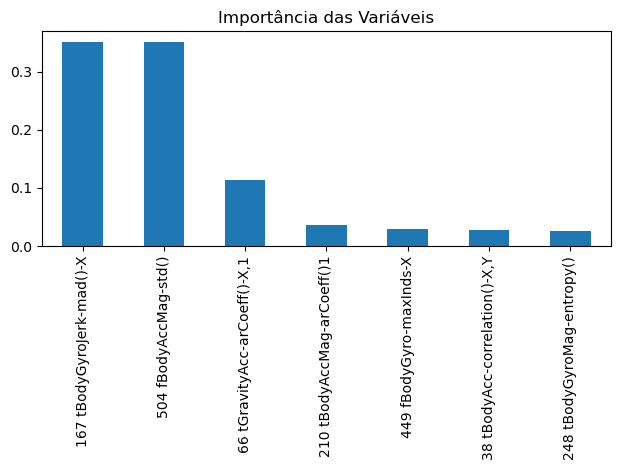

In [20]:
# Pegando as 3 variáveis de maior importância 
forest_importances = pd.Series(tree_simples.feature_importances_, index=X_treino.columns).sort_values(ascending=False).head(7)

# Plotando as importâncias como barras
fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Importância das Variáveis")
fig.tight_layout()
plt.show()

In [21]:
# Selecionando as 3 variáveis de maior importância
top_3_vars = list(forest_importances.head(3).index)
print(f"Nomes das 3 variáveis de maior importância: {top_3_vars}")

# Filtrando as bases para as 3 variáveis mais importantes
X_tr_com_binaria = X_treino[top_3_vars]
X_tt_com_binaria = X_teste[top_3_vars]

Nomes das 3 variáveis de maior importância: ['167 tBodyGyroJerk-mad()-X', '504 fBodyAccMag-std()', '66 tGravityAcc-arCoeff()-X,1']


In [22]:
%%time
# Calculando a árvore de decisão, considerando as bases anteriomente selecionadas
tree_novo = DecisionTreeClassifier(random_state=2360873, min_samples_leaf = min_samples_leaf)
path = tree_novo.cost_complexity_pruning_path(X_tr_com_binaria, y_tr_binaria)

# Calculando o  ccp_alpha
ccp_alphas_novo, impurities_novo = path.ccp_alphas, path.impurities

# ccp_alphas únicos e positivos
ccp_alphas_novo = np.unique(ccp_alphas_novo[ccp_alphas_novo>=0])

print("Foram calculados", pd.DataFrame(ccp_alphas_novo).nunique(axis=1).sum(), "quantidade de ccp_alphas únicos.")
print("\n")
print("Os valores de ccp_alpha calculados são:\n", ccp_alphas_novo)

# Considerando o mesmo melhor valor de k, encontrado acima: 
k = 3

grid3_novo = Grid(k, ccp_alphas_novo)

resultados3_novo = pd.DataFrame(grid3_novo.cv_results_)
display(resultados3_novo.head(2))
print("\n")
print("Melhor valor de grid para esses valores de ccp_alpha:", grid3_novo.best_score_)
print("\n")

Foram calculados 38 quantidade de ccp_alphas únicos.


Os valores de ccp_alpha calculados são:
 [0.00000000e+00 1.01582623e-05 1.07972583e-05 1.14254625e-05
 2.17627856e-05 2.61021265e-05 4.66834821e-05 6.60097000e-05
 6.80463414e-05 8.67654948e-05 8.73534035e-05 1.03061336e-04
 1.03632313e-04 1.38044999e-04 1.60234685e-04 1.64947357e-04
 1.66449739e-04 1.69214058e-04 2.01156761e-04 2.05171043e-04
 2.12924148e-04 3.56492143e-04 4.00341755e-04 5.04674632e-04
 5.93939446e-04 6.12669257e-04 6.24685940e-04 9.99925388e-04
 1.01202749e-03 1.11253866e-03 1.90644505e-03 4.25304589e-03
 4.57675701e-03 4.80249724e-03 8.15850061e-03 2.69841462e-02
 8.37353362e-02 8.40733338e-02]
ccp_alphas reduzidos:
 [0.00000000e+00 1.14254625e-05 4.66834821e-05 8.67654948e-05
 1.03632313e-04 1.64947357e-04 2.01156761e-04 3.56492143e-04
 5.93939446e-04 9.99925388e-04 1.90644505e-03 4.80249724e-03
 8.37353362e-02]
Fitting 15 folds for each of 13 candidates, totalling 195 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split8_test_score,split9_test_score,split10_test_score,split11_test_score,split12_test_score,split13_test_score,split14_test_score,mean_test_score,std_test_score,rank_test_score
0,0.039524,0.019031,0.007738,0.005039,0.000000,{'ccp_alpha': 0.0},0.824847,0.718941,0.863265,0.82449,...,0.685714,0.744898,0.781633,0.765306,0.904082,0.718367,0.822449,0.778702,0.063063,9
1,0.020537,0.019270,0.002627,0.003181,0.000011,{'ccp_alpha': 1.142546245919482e-05},0.824847,0.718941,0.863265,0.82449,...,0.685714,0.744898,0.781633,0.765306,0.904082,0.718367,0.822449,0.778702,0.063063,9




Melhor valor de grid para esses valores de ccp_alpha: 0.7981487177355666


CPU times: total: 7.7 s
Wall time: 7.8 s


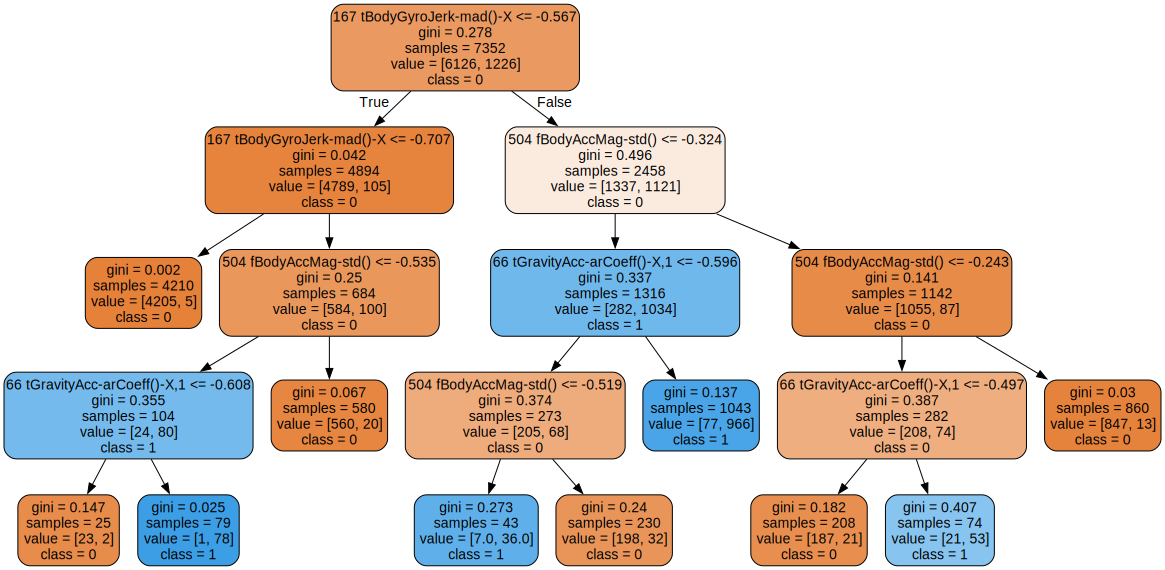

In [23]:
# Utilizando o valor de k = 3 da árvore calculada anteriormente, como sendo a melhor árvore
ccp_alpha_novo = resultados3_novo.iloc[grid3_novo.best_index_,4]
tree_novo = DecisionTreeClassifier(random_state = 2360873, 
                              min_samples_leaf = min_samples_leaf,
                              ccp_alpha = ccp_alpha_novo)
tree_novo.fit(X_tr_com_binaria, y_tr_binaria)  

# Gerando a visualização da árvore ajustada
tree_dot_novo = export_graphviz(tree_novo, 
                           out_file=None, 
                           feature_names=X_tr_com_binaria.columns, 
                           class_names=[str(cls) for cls in y_tr_binaria.unique()],
                           filled=True, 
                           rounded=True)
tree_viz_novo = graphviz.Source(tree_dot_novo)
tree_viz_novo

A melhor acurácia na base de teste utilizando o alpha igual a 0.0019064450455210389 é 0.9575839837122497


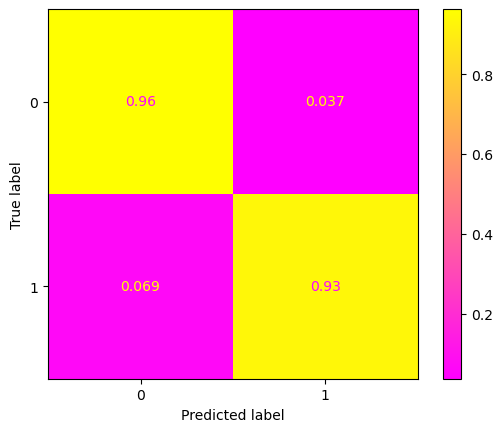

In [24]:
# Calculo da acurácia na base de testes
score_novo = tree_novo.score(X_tt_com_binaria, y_tt_binaria)  

print(f"A melhor acurácia na base de teste utilizando o alpha igual a {ccp_alpha_novo} é {score_novo}")

# Matriz de confusão para a melhor árvore na base de teste
ConfusionMatrixDisplay.from_estimator(
    tree_novo,
    X_tt_com_binaria,
    y_tt_binaria,
    cmap=plt.cm.spring,
    normalize='true'
)

Há um aumento na acurácia ao utilizarmos o modelo simplificado, o que o torna ainda mais adequado para a geração de insights e a tomada de decisões. No entanto, a simplificação do modelo utilizado na árvore deve ser considerada com cautela, uma vez que estamos limitando a capacidade de previsão a apenas um rótulo entre os seis iniciais. Dessa forma, a simplificação pode se tornar excessivamente simplória, comprometendo sua aplicabilidade em previsões reais. Para mitigar essa limitação, algumas estratégias podem ser adotadas. Primeiramente, pode-se implementar um modelo hierárquico, no qual a árvore binária atua como um filtro inicial para identificar a classe de maior erro, enquanto um segundo modelo multiclasse é ajustado para prever as demais classes, garantindo a capacidade de classificação completa. Além disso, a inclusão de mais variáveis preditivas, selecionadas com base em sua importância para todas as classes, pode enriquecer o modelo sem sacrificar sua interpretabilidade. 